In [ ]:
########## DECISION TREE REGRESSOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

In [2]:
cd_df=pd.read_csv("Company_Data.csv")

In [3]:
cd_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# there are no null values in the data set

<AxesSubplot:>

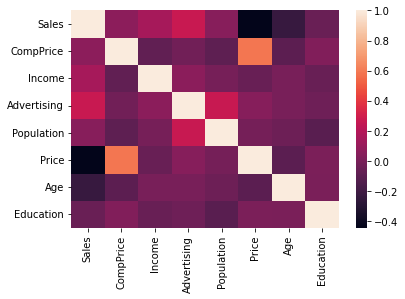

In [6]:
sns.heatmap(data=cd_df.corr())

In [7]:
# Data Preprocessing

In [8]:
# Converting the categorical data to numerical data
label_encoder=preprocessing.LabelEncoder()
cd_df['ShelveLoc']=label_encoder.fit_transform(cd_df['ShelveLoc'])
cd_df['Urban']=label_encoder.fit_transform(cd_df['Urban'])
cd_df['US']=label_encoder.fit_transform(cd_df['US'])

In [9]:
cd_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


<AxesSubplot:>

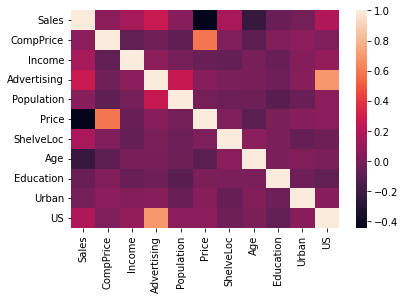

In [10]:
sns.heatmap(data=cd_df.corr())

In [ ]:
# Converting Sales data to categorical data

#cd_df.Sales=pd.cut(cd_df.Sales,bins=[-1,6,12,18],labels=['Low','Medium','High'])

In [ ]:
#cd_df.head()

In [ ]:
# Train And Test splitting

In [11]:
x=cd_df.iloc[:,1:]
y=cd_df.iloc[:,0]

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [15]:
y_test

132    9.54
390    5.47
310    9.53
3      7.40
248    5.36
       ... 
361    8.68
197    2.52
23     5.87
54     4.90
58     5.42
Name: Sales, Length: 80, dtype: float64

# MODEL BUILDING 

In [16]:
# M1: Decision Trees using squared_error 

In [17]:
m1=DecisionTreeRegressor( criterion='squared_error',
                                max_depth=7,
                                min_samples_split=20,
                                random_state=40)
m1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=20, random_state=40)

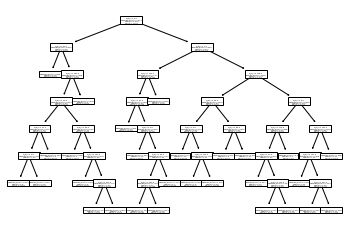

In [18]:
tree.plot_tree(m1);

In [19]:
'''fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(m1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
               '''

"fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']\ncn=['Low', 'Medium', 'High']\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)\ntree.plot_tree(m1,\n               feature_names = fn, \n               class_names=cn,\n               filled = True);\n               "

In [20]:
                            #Predicting on test data
preds = m1.predict(x_test) 
preds.shape
#pd.Series(preds).value_counts()

(80,)

In [24]:
print(metrics.mean_absolute_percentage_error(y_test,preds))

0.617446354844884


In [25]:
def mape(actual,predicted):
    abs_errs=[]
    for i in range(len(predicted)):
        error=actual-predicted
        abs_errs.append(abs(error))
    #print(len(abs_errs))
    #mape_c=sum(abs_errs)/len(abs_errs)
    return abs_errs
    

In [26]:
mape_sqr=mape(y_test,preds)
print(sum(mape_sqr)/len(mape_sqr))

132    1.719231
390    0.853636
310    3.551818
3      1.253333
248    1.371250
         ...   
361    1.852632
197    3.481667
23     0.131667
54     1.078182
58     1.339643
Name: Sales, Length: 80, dtype: float64


# M2: Decision Trees using absolute_error

In [27]:
m2=DecisionTreeRegressor(criterion='absolute_error',
                                max_depth=5,
                                min_samples_split=10,
                                random_state=40)
m2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_split=10, random_state=40)

In [28]:
preds_abs = m2.predict(x_test) 
pd.Series(preds_abs).value_counts()

6.380     17
6.785      9
8.730      8
4.990      8
4.830      6
10.560     6
6.770      5
7.490      4
12.570     4
8.010      3
10.995     2
8.700      2
8.430      2
10.060     2
0.530      1
7.910      1
dtype: int64

In [29]:
print(metrics.mean_absolute_percentage_error(y_test,preds_abs))

0.6738950749756383


# M3: Bagging

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
print("Accuracy of the model for given no of trees: ")
for i in range(100,500,50):
    print("No of trees :",i)
    kfold = KFold(n_splits=8,shuffle=True)
    cart = DecisionTreeRegressor()


    num_trees = i
    m3 = BaggingRegressor(base_estimator=cart, max_samples=0.75,n_estimators=num_trees,random_state=8)
    results = cross_val_score(m3, x, y, cv=kfold)
    print(results.mean())
    

# M4 : Random Forest

In [ ]:
print("Accuracy of the model for given no of trees and features : ")
for j in range(100,500,50):
    print("No of trees :",j)
    for i in range(3,11):
        num_trees = j
        max_features = i
       # kfold = KFold(n_splits=8)

        m4 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features,random_state=8)
        results = cross_val_score(m4, x, y, cv=kfold)
        print("no of features :" ,i," :" ,results.mean())
